In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integ
from astropy.io import ascii
from scipy import interpolate
import scipy.stats as stats
from astropy.table import Table, Column
import readsnap as rs


plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 15
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 15


# Constants in CGS

G = 6.6726e-08
Ro = 6.96e10
Mo = 1.99e33
c = 2.9979e+10
day = 60*60*24

DistUnit = Ro
MassUnit = Mo
TimeUnit = np.sqrt(DistUnit**3/(G*MassUnit))
VelUnit = DistUnit/TimeUnit
AngMomUnit = DistUnit*VelUnit*MassUnit

SpinUnit = AngMomUnit*c/(G*Mo**2)

DensityUnit = MassUnit/(DistUnit**3)


Tday = TimeUnit/(60*60*24)

#=====================================================
# Finds index of the element in an array 
# with the closest value to "value"

def find_nearest(array,value):
        idx = (np.abs(array-value)).argmin()
#     return array[idx]
        return idx

In [2]:
print(TimeUnit)
print(DensityUnit)

1593.4548986025416
5.90235541827


## data from snapshots and dynamics file

In [2]:
def snapdata(path,snap):
    data = rs.readsnap(path,snap,0)
    dataBH = rs.readsnap(path,snap,5,skip_bh = 1)
    dataSTAR = rs.readsnap(path,snap,4)
    
    return data,dataBH,dataSTAR

def Get_dynamics(filename):

    """Getting the data from the dynmaics file"""
    
    dyn = np.genfromtxt(filename)    
    
    colnames = ('t','Macc_bh','Engy_bh','PaccX_bh','PaccY_bh','PaccZ_bh','LaccX_bh','LaccY_bh' \
                ,'LaccZ_bh','M_gas','X_gas','Y_gas','Z_gas','PX_gas','PY_gas','PZ_gas' \
                ,'LX_gas','LY_gas','LZ_gas', 'M_star','X_star','Y_star','Z_star','PX_star' \
                ,'PY_star','PZ_star','LX_star','LY_star','LZ_star','M_bh','X_bh','Y_bh' \
                ,'Z_bh','PX_bh','PY_bh','PZ_bh','LX_bh','LY_bh','LZ_bh','Macc_star', 'Engy_star' \
                ,'PaccX_star','PaccY_star','PaccZ_star','LaccX_star','LaccY_star' \
                ,'LaccZ_star','LaccX_starCM','LaccY_starCM','LaccZ_starCM','LaccX_bhCM' \
                ,'LaccY_bhCM','LaccZ_bhCM','rp')
    
    print np.shape(dyn), len(colnames)
    dat = Table(dyn,names=colnames)
    

    return dat



In [3]:
testReadFile1 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0309_1/dynamics.txt"
dataTable1 = Get_dynamics(testReadFile1)
testReadFile2 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0309_2/dynamics.txt"
dataTable2 = Get_dynamics(testReadFile2)
testReadFile3 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0309_3/dynamics.txt"
dataTable3 = Get_dynamics(testReadFile3)
testReadFile4 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0309_4/dynamics.txt"
dataTable4 = Get_dynamics(testReadFile4)
testReadFile5 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_19/dynamics.txt"
dataTable5 = Get_dynamics(testReadFile5)

(1000, 54) 54
(1000, 54) 54
(1000, 54) 54
(636, 54) 54
(3376, 54) 54


In [53]:
# testReadFile1 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_1/dynamics.txt"
# dataTable1 = Get_dynamics(testReadFile1)
# testReadFile2 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_2/dynamics.txt"
# dataTable2 = Get_dynamics(testReadFile2)
# testReadFile3 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_3/dynamics.txt"
# dataTable3 = Get_dynamics(testReadFile3)
# testReadFile4 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_4/dynamics.txt"
# dataTable4 = Get_dynamics(testReadFile4)
# testReadFile5 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_5/dynamics.txt"
# dataTable5 = Get_dynamics(testReadFile5)
# testReadFile6 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_6/dynamics.txt"
# dataTable6 = Get_dynamics(testReadFile6)
# testReadFile7 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_7/dynamics.txt"
# dataTable7 = Get_dynamics(testReadFile7)
# testReadFile8 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_8/dynamics.txt"
# dataTable8 = Get_dynamics(testReadFile8)
# testReadFile9 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_9/dynamics.txt"
# dataTable9 = Get_dynamics(testReadFile9)
# testReadFile10 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_10/dynamics.txt"
# dataTable10 = Get_dynamics(testReadFile10)
# testReadFile11 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_11/dynamics.txt"
# dataTable11 = Get_dynamics(testReadFile11)
# testReadFile12 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_12/dynamics.txt"
# dataTable12 = Get_dynamics(testReadFile12)

testReadFile1 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_13/dynamics.txt"
dataTable1 = Get_dynamics(testReadFile1)
testReadFile2 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_14/dynamics.txt"
dataTable2 = Get_dynamics(testReadFile2)
testReadFile3 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_15/dynamics.txt"
dataTable3 = Get_dynamics(testReadFile3)
testReadFile4 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_16/dynamics.txt"
dataTable4 = Get_dynamics(testReadFile4)
testReadFile5 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_17/dynamics.txt"
dataTable5 = Get_dynamics(testReadFile5)
testReadFile6 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_18/dynamics.txt"
dataTable6 = Get_dynamics(testReadFile6)
testReadFile7 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_19/dynamics.txt"
dataTable7 = Get_dynamics(testReadFile7)
testReadFile8 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_20/dynamics.txt"
dataTable8 = Get_dynamics(testReadFile8)
testReadFile9 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_21/dynamics.txt"
dataTable9 = Get_dynamics(testReadFile9)
testReadFile10 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_22/dynamics.txt"
dataTable10 = Get_dynamics(testReadFile10)
testReadFile11 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_23/dynamics.txt"
dataTable11 = Get_dynamics(testReadFile11)
testReadFile12 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_24/dynamics.txt"
dataTable12 = Get_dynamics(testReadFile12)

# testReadFile1 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_25/dynamics.txt"
# dataTable1 = Get_dynamics(testReadFile1)
# testReadFile2 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_26/dynamics.txt"
# dataTable2 = Get_dynamics(testReadFile2)
# testReadFile3 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_27/dynamics.txt"
# dataTable3 = Get_dynamics(testReadFile3)
# testReadFile4 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_28/dynamics.txt"
# dataTable4 = Get_dynamics(testReadFile4)
# testReadFile5 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_29/dynamics.txt"
# dataTable5 = Get_dynamics(testReadFile5)
# testReadFile6 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_30/dynamics.txt"
# dataTable6 = Get_dynamics(testReadFile6)
# testReadFile7 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_31/dynamics.txt"
# dataTable7 = Get_dynamics(testReadFile7)
# testReadFile8 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_32/dynamics.txt"
# dataTable8 = Get_dynamics(testReadFile8)
# testReadFile9 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_33/dynamics.txt"
# dataTable9 = Get_dynamics(testReadFile9)
# testReadFile10 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_34/dynamics.txt"
# dataTable10 = Get_dynamics(testReadFile10)
# testReadFile11 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_35/dynamics.txt"
# dataTable11 = Get_dynamics(testReadFile11)
# testReadFile12 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0212_36/dynamics.txt"
# dataTable12 = Get_dynamics(testReadFile12)

(10001, 54) 54
(10001, 54) 54
(6744, 54) 54
(10001, 54) 54
(6792, 54) 54
(3997, 54) 54
(3376, 54) 54
(3234, 54) 54
(3101, 54) 54
(3004, 54) 54
(2896, 54) 54
(2833, 54) 54
(274, 54) 54


In [5]:
print((dataTable1['Macc_bh']))
print(np.diff(dataTable1['Macc_bh']))

 Macc_bh 
---------
      0.0
0.0372438
0.0420227
 0.069116
 0.125866
 0.192456
 0.262041
 0.343398
 0.439477
 0.545868
      ...
  3.99771
  3.99771
  3.99771
  3.99771
  3.99771
  3.99771
  3.99771
  3.99771
  3.99771
  3.99771
  3.99771
Length = 10001 rows
      Macc_bh       
--------------------
           0.0372438
0.004778900000000003
0.027093299999999994
 0.05675000000000001
 0.06658999999999998
 0.06958500000000004
 0.08135699999999996
 0.09607900000000003
 0.10639100000000001
 0.11292099999999994
                 ...
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
                 0.0
Length = 10000 rows


In [87]:
Mdot_exp_1 = np.gradient(dataTable1['Macc_bh'])/(np.gradient(dataTable1['t'])*TimeUnit)
Mdot_exp_2 = np.gradient(dataTable2['Macc_bh'])/(np.gradient(dataTable2['t'])*TimeUnit)
Mdot_exp_3 = np.gradient(dataTable3['Macc_bh'])/(np.gradient(dataTable3['t'])*TimeUnit)

np.savetxt("Mdot_0212_7.csv", np.asarray([ dataTable1['t']*TimeUnit,Mdot_exp_1]), delimiter=",")
np.savetxt("Mdot_0212_19.csv", np.asarray([ dataTable2['t']*TimeUnit,Mdot_exp_2]), delimiter=",")
np.savetxt("Mdot_0212_31.csv", np.asarray([ dataTable3['t']*TimeUnit,Mdot_exp_3]), delimiter=",")

In [54]:
# dt_7 = np.diff(dataTable7['t'])*TimeUnit
# cumsum_time_7 = np.append([0],np.cumsum(dt_7))
# Mdot_exp_7 = np.diff(dataTable7['Macc_bh'])/dt_7
# Mdot_exp_7 = np.append([0],Mdot_exp_7)

Mdot_exp_1 = np.gradient(dataTable1['Macc_bh'])/(np.gradient(dataTable1['t'])*TimeUnit)
Mdot_exp_2 = np.gradient(dataTable2['Macc_bh'])/(np.gradient(dataTable2['t'])*TimeUnit)
Mdot_exp_3 = np.gradient(dataTable3['Macc_bh'])/(np.gradient(dataTable3['t'])*TimeUnit)
Mdot_exp_4 = np.gradient(dataTable4['Macc_bh'])/(np.gradient(dataTable4['t'])*TimeUnit)
Mdot_exp_5 = np.gradient(dataTable5['Macc_bh'])/(np.gradient(dataTable5['t'])*TimeUnit)
Mdot_exp_6 = np.gradient(dataTable6['Macc_bh'])/(np.gradient(dataTable6['t'])*TimeUnit)
Mdot_exp_7 = np.gradient(dataTable7['Macc_bh'])/(np.gradient(dataTable7['t'])*TimeUnit)
Mdot_exp_8 = np.gradient(dataTable8['Macc_bh'])/(np.gradient(dataTable8['t'])*TimeUnit)
Mdot_exp_9 = np.gradient(dataTable9['Macc_bh'])/(np.gradient(dataTable9['t'])*TimeUnit)
Mdot_exp_10 = np.gradient(dataTable10['Macc_bh'])/(np.gradient(dataTable10['t'])*TimeUnit)
Mdot_exp_11 = np.gradient(dataTable11['Macc_bh'])/(np.gradient(dataTable11['t'])*TimeUnit)
Mdot_exp_12 = np.gradient(dataTable12['Macc_bh'])/(np.gradient(dataTable12['t'])*TimeUnit)

In [72]:
testReadFile99 = "/Users/alejandro/Dropbox/Alejandro_CE_SN/Data/NS_MESA10_2021/0222_2/dynamics.txt"
dataTable99 = Get_dynamics(testReadFile99)
Mdot_exp_99 = np.gradient(dataTable99['Macc_bh'])/(np.gradient(dataTable99['t'])*TimeUnit)
Mdot_exp_99[0:10]

(16589, 54) 54


0.0003717062163771332
0.009879962143736102
0.013310658404913689
0.0054925257822884795
0.0035267197687623183
0.0017564946226176848
0.0014329731166578782
0.001994722369525307
0.0017858538987306043
0.0017238387084282255


In [83]:
np.savetxt("Mdot_0212_13.csv", np.asarray([ dataTable1['t']*TimeUnit,Mdot_exp_1]), delimiter=",")
np.savetxt("Mdot_0212_14.csv", np.asarray([ dataTable2['t']*TimeUnit,Mdot_exp_2]), delimiter=",")
np.savetxt("Mdot_0212_15.csv", np.asarray([ dataTable3['t']*TimeUnit,Mdot_exp_3]), delimiter=",")
np.savetxt("Mdot_0212_16.csv", np.asarray([ dataTable4['t']*TimeUnit,Mdot_exp_4]), delimiter=",")
np.savetxt("Mdot_0212_17.csv", np.asarray([ dataTable5['t']*TimeUnit,Mdot_exp_5]), delimiter=",")
np.savetxt("Mdot_0212_18.csv", np.asarray([ dataTable6['t']*TimeUnit,Mdot_exp_6]), delimiter=",")
np.savetxt("Mdot_0212_19.csv", np.asarray([ dataTable7['t']*TimeUnit,Mdot_exp_7]), delimiter=",")
np.savetxt("Mdot_0212_20.csv", np.asarray([ dataTable8['t']*TimeUnit,Mdot_exp_8]), delimiter=",")
np.savetxt("Mdot_0212_21.csv", np.asarray([ dataTable9['t']*TimeUnit,Mdot_exp_9]), delimiter=",")
np.savetxt("Mdot_0212_22.csv", np.asarray([ dataTable10['t']*TimeUnit,Mdot_exp_10]), delimiter=",")
np.savetxt("Mdot_0212_23.csv", np.asarray([ dataTable11['t']*TimeUnit,Mdot_exp_11]), delimiter=",")
np.savetxt("Mdot_0212_24.csv", np.asarray([ dataTable12['t']*TimeUnit,Mdot_exp_12]), delimiter=",")

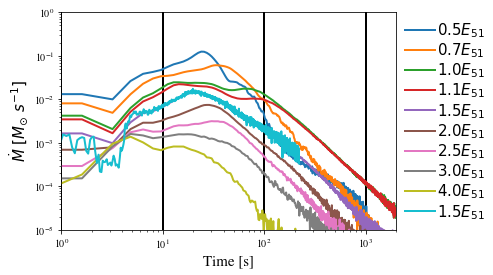

In [68]:
plt.plot(dataTable1['t']*TimeUnit,Mdot_exp_1,label='$0.5E_{51}$')
plt.plot(dataTable2['t']*TimeUnit,Mdot_exp_2,label='$0.7E_{51}$')
# plt.plot(dataTable3['t']*TimeUnit,Mdot_exp_3,label='$0.9E_{51}$')
plt.plot(dataTable4['t']*TimeUnit,Mdot_exp_4,label='$1.0E_{51}$')
plt.plot(dataTable5['t']*TimeUnit,Mdot_exp_5,label='$1.1E_{51}$')
# plt.plot(dataTable6['t']*TimeUnit,Mdot_exp_6,label='$1.3E_{51}$')
plt.plot(dataTable7['t']*TimeUnit,Mdot_exp_7_v2,'-',label='$1.5E_{51}$')
# plt.plot(dataTable8['t']*TimeUnit,Mdot_exp_8,label='$1.7E_{51}$')
plt.plot(dataTable9['t']*TimeUnit,Mdot_exp_9,label='$2.0E_{51}$')
plt.plot(dataTable10['t']*TimeUnit,Mdot_exp_10,label='$2.5E_{51}$')
plt.plot(dataTable11['t']*TimeUnit,Mdot_exp_11,label='$3.0E_{51}$')
plt.plot(dataTable12['t']*TimeUnit,Mdot_exp_12,label='$4.0E_{51}$')

plt.plot(dataTable99['t']*TimeUnit,Mdot_exp_99,label='$1.5E_{51}$')

minValY = 1e-5
maxValY = 1
plt.vlines(ymin=minValY,ymax=maxValY, x=1.0, color='k')
plt.vlines(ymin=minValY,ymax=maxValY, x=10.0, color='k')
plt.vlines(ymin=minValY,ymax=maxValY, x=100.0, color='k')
plt.vlines(ymin=minValY,ymax=maxValY, x=1000.0, color='k')

plt.legend(loc='right')
plt.ylabel('$\dot{M}\ [M_{\odot}\ s^{-1}]$')
plt.xlabel('Time [s]')
plt.yscale('log')
plt.xscale('log')
plt.xlim([1, 2000])
plt.ylim([minValY, maxValY])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("./Plots/accretionRateStar_MESA10.png")



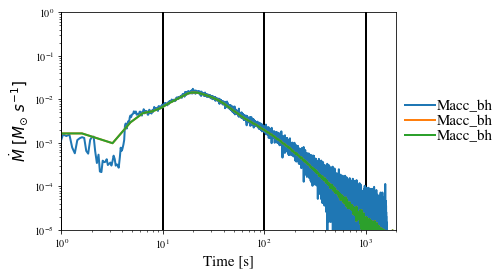

In [75]:
plt.plot(dataTable99['t']*TimeUnit,Mdot_exp_99)
plt.plot(dataTable7['t']*TimeUnit,Mdot_exp_7)

minValY = 1e-5
maxValY = 1
plt.vlines(ymin=minValY,ymax=maxValY, x=1.0, color='k')
plt.vlines(ymin=minValY,ymax=maxValY, x=10.0, color='k')
plt.vlines(ymin=minValY,ymax=maxValY, x=100.0, color='k')
plt.vlines(ymin=minValY,ymax=maxValY, x=1000.0, color='k')

plt.legend(loc='right')
plt.ylabel('$\dot{M}\ [M_{\odot}\ s^{-1}]$')
plt.xlabel('Time [s]')
plt.yscale('log')
plt.xscale('log')
plt.xlim([1, 2000])
plt.ylim([minValY, maxValY])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("./Plots/accretionRateStar_MESA10.png")



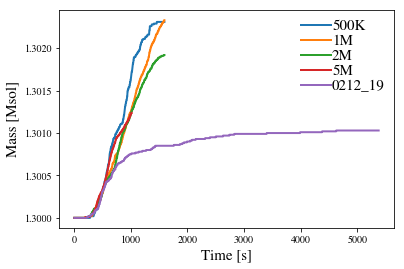

In [4]:
plt.plot(dataTable1['t']*TimeUnit,dataTable1['M_star'],label='500K')
plt.plot(dataTable2['t']*TimeUnit,dataTable2['M_star'],label='1M')
plt.plot(dataTable3['t']*TimeUnit,dataTable3['M_star'],label='2M')
plt.plot(dataTable4['t']*TimeUnit,dataTable4['M_star'],label='5M')
plt.plot(dataTable5['t']*TimeUnit,dataTable5['M_star'],label='0212_19')
# plt.plot(dataTable10['t']*TimeUnit,dataTable10['M_star'],label='0212_10')
# plt.plot(dataTable11['t']*TimeUnit,dataTable11['M_star'],'--',label='0212_11')
# plt.plot(dataTable12['t']*TimeUnit,dataTable12['M_star'],'--',label='0212_12')

plt.legend(loc='right')
plt.ylabel('Mass [Msol]')
plt.xlabel('Time [s]')

plt.legend()
plt.savefig("accretionNS_MESA10.png")

In [ ]:
print(dataTable5['M_star'][200]-dataTable5['M_star'][1])

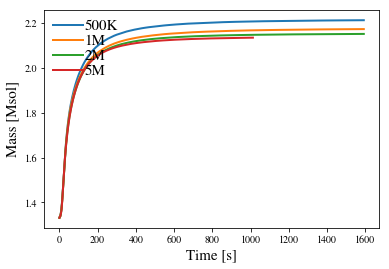

In [5]:
# plt.plot(dataTable1['t']*TimeUnit,dataTable1['M_bh'],label='0212_1')
# plt.plot(dataTable2['t']*TimeUnit,dataTable2['M_bh'],label='0212_2')
# plt.plot(dataTable3['t']*TimeUnit,dataTable3['M_bh'],label='0212_3')
# plt.plot(dataTable4['t']*TimeUnit,dataTable4['M_bh'],label='0212_4')
# plt.plot(dataTable5['t']*TimeUnit,dataTable5['M_bh'],label='0212_5')
# plt.plot(dataTable6['t']*TimeUnit,dataTable6['M_bh'],label='0212_6')
# plt.plot(dataTable7['t']*TimeUnit,dataTable7['M_bh'],label='0212_7')
# plt.plot(dataTable8['t']*TimeUnit,dataTable8['M_bh'],label='0212_8')
# plt.plot(dataTable9['t']*TimeUnit,dataTable9['M_bh'],label='0212_9')
# plt.plot(dataTable10['t']*TimeUnit,dataTable10['M_bh'],label='0212_10')
# plt.plot(dataTable11['t']*TimeUnit,dataTable11['M_bh'],'--',label='0212_11')
# plt.plot(dataTable12['t']*TimeUnit,dataTable12['M_bh'],'--',label='0212_12')

plt.plot(dataTable1['t']*TimeUnit,dataTable1['M_bh'],label='500K')
plt.plot(dataTable2['t']*TimeUnit,dataTable2['M_bh'],label='1M')
plt.plot(dataTable3['t']*TimeUnit,dataTable3['M_bh'],label='2M')
plt.plot(dataTable4['t']*TimeUnit,dataTable4['M_bh'],label='5M')


x = np.arange(0.0, 5, 0.1)*TimeUnit
# plt.fill_between(x, 1.6, 2.7,facecolor='yellow',label='$GW190425$', alpha=0.5,hatch='/')
# plt.fill_between(x, 1.17, 1.36,facecolor='yellow',label='$GW170817$', alpha=0.5)
# plt.fill_between(x, 1.97, 2.33,facecolor='grey',label='$M_{TOV}$')

# plt.xscale('log')
plt.legend(loc='upper left')
plt.ylabel('Mass [Msol]')
plt.xlabel('Time [s]')
# plt.xlim([50, 150])
# plt.ylim([1.95, 2.15])
plt.savefig("accretionExplodingStar_MESA10_convergence.png")

Text(0.5,0,'Time [s]')

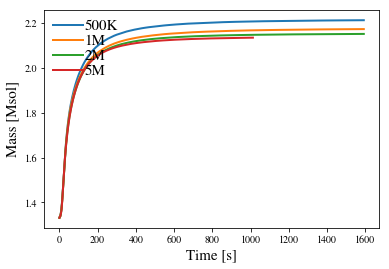

In [6]:
# Resolution study
plt.plot(dataTable1['t']*TimeUnit,dataTable1['M_bh'],label='500K')
plt.plot(dataTable2['t']*TimeUnit,dataTable2['M_bh'],label='1M')
plt.plot(dataTable3['t']*TimeUnit,dataTable3['M_bh'],label='2M')
plt.plot(dataTable4['t']*TimeUnit,dataTable4['M_bh'],label='5M')
# plt.plot(dataTable5['t']*TimeUnit,dataTable5['M_bh'],label='0212_19')

x = np.arange(0.0, 5, 0.1)*TimeUnit
plt.legend(loc='upper left')
plt.ylabel('Mass [Msol]')
plt.xlabel('Time [s]')
# plt.xlim([50, 150])
# plt.ylim([1.95, 2.15])

In [7]:
np.savetxt("MNS_500K.csv", np.asarray([ dataTable1['t']*TimeUnit,dataTable1['M_bh']]), delimiter=",")
np.savetxt("MNS_1M.csv", np.asarray([ dataTable2['t']*TimeUnit,dataTable2['M_bh']]), delimiter=",")
np.savetxt("MNS_2M.csv", np.asarray([ dataTable3['t']*TimeUnit,dataTable3['M_bh']]), delimiter=",")
np.savetxt("MNS_5M.csv", np.asarray([ dataTable4['t']*TimeUnit,dataTable4['M_bh']]), delimiter=",")


In [7]:
print(dataTable1['M_bh'][-1])
print(dataTable2['M_bh'][-1])
print(dataTable3['M_bh'][-1])
print(dataTable4['M_bh'][-1])
print(dataTable5['M_bh'][-1])
print(dataTable6['M_bh'][-1])
print(dataTable7['M_bh'][-1])
print(dataTable8['M_bh'][-1])
print(dataTable9['M_bh'][-1])

2.21267
2.17306
2.15152
2.1263
2.13387


NameError: name 'dataTable6' is not defined

In [ ]:
print(dataTable1['M_bh'][-1])
print(dataTable2['M_bh'][-1])
print(dataTable3['M_bh'][-1])
print(dataTable4['M_bh'][-1])
print(dataTable5['M_bh'][-1])
print(dataTable6['M_bh'][-1])
print(dataTable7['M_bh'][-1])
print(dataTable8['M_bh'][-1])
print(dataTable9['M_bh'][-1])
print(dataTable10['M_bh'][-1])
print(dataTable11['M_bh'][-1])
print(dataTable12['M_bh'][-1])